# FIFA World Cup Challenge 

## Data Wrangling and Exploratory Data Analysis of the given data sets

In [286]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly import tools

In [12]:
df_players = pd.read_csv('WorldCupPlayers.csv')
df_matches = pd.read_csv('WorldCupMatches.csv')
df_wcups = pd.read_csv('WorldCups.csv')


In [13]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [14]:
df_wcups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [15]:
df_wcups['Country'].unique()   # there are 15 unique countries  in the worldCup table.

array(['Uruguay', 'Italy', 'France', 'Brazil', 'Switzerland', 'Sweden',
       'Chile', 'England', 'Mexico', 'Germany', 'Argentina', 'Spain',
       'USA', 'Korea/Japan', 'South Africa'], dtype=object)

In [16]:
df_wcups['Country'].nunique()

15

In [17]:
df_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [20]:
df_matches.shape

(4572, 20)

In [21]:
df_wcups.shape

(20, 10)

In [22]:
df_players.shape

(37784, 9)

### Check for the info on datatypes and not null values

In [23]:
df_matches.info() #out of 4572 rows only 852 rows have values rest are empty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [14]:
df_players.info() #Position and event columns have null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
 9   conc           37784 non-null  object
dtypes: int64(3), object(7)
memory usage: 2.9+ MB


In [24]:
df_wcups.info()  #looks like no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


### check for null/missing values

In [25]:
df_matches.isnull().sum()  #3720 the null values

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [26]:
df_matches.isnull().sum()* 100 / len(df_matches)  #check the percentage of null values majority null entries

Year                    81.364829
Datetime                81.364829
Stage                   81.364829
Stadium                 81.364829
City                    81.364829
Home Team Name          81.364829
Home Team Goals         81.364829
Away Team Goals         81.364829
Away Team Name          81.364829
Win conditions          81.364829
Attendance              81.408574
Half-time Home Goals    81.364829
Half-time Away Goals    81.364829
Referee                 81.364829
Assistant 1             81.364829
Assistant 2             81.364829
RoundID                 81.364829
MatchID                 81.364829
Home Team Initials      81.364829
Away Team Initials      81.364829
dtype: float64

In [28]:
df_matches.tail(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_players.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [32]:

df_players.isnull().sum()* 100 / len(df_players)  #check the percentage of null values

RoundID           0.000000
MatchID           0.000000
Team Initials     0.000000
Coach Name        0.000000
Line-up           0.000000
Shirt Number      0.000000
Player Name       0.000000
Position         89.035041
Event            75.997777
dtype: float64

In [33]:
df_wcups.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [34]:
df_players.pop('Position')   # Delete Position column

0         GK
1         GK
2        NaN
3        NaN
4        NaN
        ... 
37779    NaN
37780    NaN
37781    NaN
37782    NaN
37783    NaN
Name: Position, Length: 37784, dtype: object

In [35]:
df_players.pop('Event')   #Delete Event column

0               NaN
1               NaN
2              G40'
3              G70'
4               NaN
            ...    
37779           NaN
37780           NaN
37781    IH46' Y65'
37782           NaN
37783           NaN
Name: Event, Length: 37784, dtype: object

In [36]:
df_players.isnull().sum()  #both Event and position columns are deleted

RoundID          0
MatchID          0
Team Initials    0
Coach Name       0
Line-up          0
Shirt Number     0
Player Name      0
dtype: int64

### Delete all empty rows

In [40]:
df_matches.dropna(how = 'all', inplace = True)
df_matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [41]:
df_matches.isnull().sum()   # but Attendance column still has 2 missing values              

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [45]:
#df_matches.dropna(how='any', inplace = True)
#df_matches     
# here only Row containing NA will be deleted. But I don't want to delete the two rows which has 
# Attendance empty. As I don't want to loose information regarding the Goals and wins. 
#so, I will replace the missing values with the average value of the attendance.

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


### Replace the two Nan with Average Attendance

In [43]:
mean_attendance = df_matches['Attendance'].mean()
mean_attendance

45164.8

In [44]:
df_matches['Attendance'].replace(to_replace= np.nan, value=mean_attendance, inplace = True)

In [45]:
df_matches.isnull().sum() #No missing values

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

### Let's check for the Duplicates

In [46]:
df_players.duplicated().sum()    # also df_players[df_players.duplicated()].shape

#out of 37784 entries 736 rows are duplicates. 

736

In [47]:
df_matches.duplicated().sum()    #also df_matches[df_matches.duplicated()].shape
    #out of 852 entries 16 rows are duplicates. 

16

In [49]:
df_matches[df_matches.duplicated()]    #16 duplicate rows as shown below

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
836,2014.0,28 Jun 2014 - 13:00,Round of 16,Estadio Mineirao,Belo Horizonte,Brazil,1.0,1.0,Chile,Brazil win on penalties (3 - 2),57714.0,0.0,0.0,WEBB Howard (ENG),MULLARKEY Michael (ENG),Darren CANN (ENG),255951.0,300186487.0,BRA,CHI
837,2014.0,28 Jun 2014 - 17:00,Round of 16,Estadio do Maracana,Rio De Janeiro,Colombia,2.0,0.0,Uruguay,,73804.0,1.0,0.0,Bj�rn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255951.0,300186491.0,COL,URU
838,2014.0,29 Jun 2014 - 13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX
839,2014.0,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
840,2014.0,30 Jun 2014 - 13:00,Round of 16,Estadio Nacional,Brasilia,France,2.0,0.0,Nigeria,,67882.0,0.0,0.0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951.0,300186462.0,FRA,NGA
841,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,45164.8,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
842,2014.0,01 Jul 2014 - 13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI
843,2014.0,01 Jul 2014 - 17:00,Round of 16,Arena Fonte Nova,Salvador,Belgium,2.0,1.0,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255951.0,300186497.0,BEL,USA
844,2014.0,04 Jul 2014 - 13:00,Quarter-finals,Estadio do Maracana,Rio De Janeiro,France,0.0,1.0,Germany,,74240.0,0.0,1.0,PITANA Nestor (ARG),MAIDANA Hernan (ARG),BELATTI Juan Pablo (ARG),255953.0,300186485.0,FRA,GER
845,2014.0,04 Jul 2014 - 17:00,Quarter-finals,Estadio Castelao,Fortaleza,Brazil,2.0,1.0,Colombia,,60342.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255953.0,300186461.0,BRA,COL


In [51]:
df_matches[df_matches['Stage'] == 'Play-off for third place']  

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
827,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [52]:
df_players[df_players.duplicated()]  #736 duplicate rows as shown below

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name
37048,255951,300186487,BRA,SCOLARI Luiz Felipe (BRA),S,12,JULIO CESAR
37049,255951,300186487,CHI,SAMPAOLI Jorge (ARG),S,1,C. BRAVO
37050,255951,300186487,BRA,SCOLARI Luiz Felipe (BRA),S,2,DANI ALVES
37051,255951,300186487,CHI,SAMPAOLI Jorge (ARG),S,2,MENA
37052,255951,300186487,BRA,SCOLARI Luiz Felipe (BRA),S,3,T SILVA
...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI


In [54]:
df_wcups[df_wcups.duplicated()]   #no duplicate values found in wcups table

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance


### Remove the duplicates

In [55]:
df_players.drop_duplicates(inplace=True)

In [56]:
df_players.duplicated().sum()     #736 duplicate rows are removed, now no more duplicates

0

In [57]:
df_matches.drop_duplicates(inplace=True)

In [58]:
df_matches.duplicated().sum()   #16 duplicate rows are removed

0

In [61]:
df_wcups   #Attendance column does not look like it is in a proper format

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.81
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [110]:
df_matches.dtypes  # Before doing further calculation first check the data types and if possible, 
                   #convert it to it appropriate data types.

Year                      int32
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
dtype: object

### Change it to appropriate datatypes

In [114]:
df_matches["Year"] = df_matches["Year"].astype('int')  #change the data type of Year to integer.
df_matches["Home Team Goals"] =  df_matches["Home Team Goals"].astype('int')
df_matches["Away Team Goals"] =  df_matches["Away Team Goals"].astype('int')
df_matches["Half-time Home Goals"] =  df_matches["Half-time Home Goals"].astype('int')
df_matches["Half-time Away Goals"] =  df_matches["Half-time Away Goals"].astype('int')
df_matches["RoundID"] = df_matches["RoundID"].astype('int')
df_matches["MatchID"] = df_matches["MatchID"].astype('int')
df_matches["Attendance"] = df_matches["Attendance"].astype('int')

In [115]:
df_matches.dtypes

Year                     int32
Datetime                object
Stage                   object
Stadium                 object
City                    object
Home Team Name          object
Home Team Goals          int32
Away Team Goals          int32
Away Team Name          object
Win conditions          object
Attendance               int32
Half-time Home Goals     int32
Half-time Away Goals     int32
Referee                 object
Assistant 1             object
Assistant 2             object
RoundID                  int32
MatchID                  int32
Home Team Initials      object
Away Team Initials      object
dtype: object

In [116]:
df_attendance = df_matches.groupby(['Year'])['Attendance'].sum()    #added all the yearwise attendance in match table and checked with final worldcup table attendance 
df_attendance = pd.DataFrame(df_attendance)                          # looks like they are related
  
df_attendance 

,Attendance
Year,
1930,590549
1934,363000
1938,375700
1950,1045246
1954,768607
1958,819810
1962,893172
1966,1563135
1970,1603975


In [368]:
df_worldcup = pd.merge(df_wcups, df_attendance, on = 'Year')
df_worldcup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_x,Attendance_y
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607,768607


In [118]:
df_worldcup.pop('Attendance_x')


0       590.549
1           363
2         375.7
3     1.045.246
4       768.607
5        819.81
6       893.172
7     1.563.135
8     1.603.975
9     1.865.753
10    1.545.791
11    2.109.723
12    2.394.031
13    2.516.215
14    3.587.538
15    2.785.100
16    2.705.197
17    3.359.439
18    3.178.856
19    3.386.810
Name: Attendance_x, dtype: object

In [119]:
df_worldcup

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_y
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753


In [120]:
df_worldcup.rename(columns={'Attendance_y' : 'Attendance' }, inplace = True)


In [121]:
df_worldcup.replace({'Germany FR' : 'Germany' }, inplace = True)

In [122]:
df_worldcup   #worldcup table looks clean now

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753


In [123]:
df_worldcup.dtypes

Year               int64
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance         int32
dtype: object

### It can be seen that the Team Names are not accurate in match table. this needs little bit of cleaning as well. 

In [124]:
df_matches.iloc[500:510]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
500,1994,02 Jul 1994 - 12:00,Round of 16,Soldier Field,Chicago,Germany,3,2,Belgium,,60246,3,1,ROETHLISBERGER Kurt (SUI),LISTKIEWICZ Michal (POL),CHRISTENSEN Carl-Johan Meyer (DEN),338,3085,GER,BEL
501,1994,02 Jul 1994 - 16:30,Round of 16,RFK Stadium,Washington Dc,Spain,3,0,Switzerland,,53121,1,0,VAN DER ENDE Mario (NED),DOLSTRA Jan (NED),MARTON Sandor (HUN),338,3086,ESP,SUI
502,1994,03 Jul 1994 - 12:00,Round of 16,Cotton Bowl,Dallas,Saudi Arabia,1,3,Sweden,,60277,0,1,MARSIGLIA Renato (BRA),ALVES Paulo Jorge (BRA),CALIX GARCIA Raimundo (HON),338,3087,KSA,SWE
503,1994,03 Jul 1994 - 13:30,Round of 16,Rose Bowl,Los Angeles,Romania,3,2,Argentina,,90469,2,1,PAIRETTO Pierluigi (ITA),RAMICONE Domenico (ITA),MATTHYS Luc (BEL),338,3088,ROU,ARG
504,1994,04 Jul 1994 - 12:00,Round of 16,Citrus Bowl,Orlando,Netherlands,2,0,Republic of Ireland,,61355,2,0,MIKKELSEN Peter (DEN),DUNSTER Gordon (AUS),BRAZZALE Eugene (AUS),338,3089,NED,IRL
505,1994,04 Jul 1994 - 12:30,Round of 16,Stanford Stadium,San Francisco,Brazil,1,0,USA,,84147,0,0,QUINIOU Joel (FRA),PARK Hae-Yong (KOR),EVERSTIG Mikael (SWE),338,3090,BRA,USA
506,1994,05 Jul 1994 - 13:00,Round of 16,Foxboro Stadium,Boston,Nigeria,1,2,Italy,Italy win after extra time,54367,0,0,BRIZIO CARTER Arturo (MEX),TAIBI Ernesto (ARG),ZARATE Venancio (PAR),338,3091,NGA,ITA
507,1994,05 Jul 1994 - 16:30,Round of 16,Giants Stadium,New York/New Jersey,Mexico,1,1,Bulgaria,Bulgaria win on penalties (1 - 3),71030,0,0,AL SHARIF Jamal (SYR),FANAEI Mohammad (IRN),AL GHATTAN Yousif Abdulla (BAH),338,3092,MEX,BUL
508,1994,09 Jul 1994 - 12:00,Quarter-finals,Foxboro Stadium,Boston,Italy,2,1,Spain,,53400,1,0,PUHL Sandor (HUN),DUNSTER Gordon (AUS),MATTHYS Luc (BEL),796,3097,ITA,ESP
509,1994,09 Jul 1994 - 14:30,Quarter-finals,Cotton Bowl,Dallas,Netherlands,2,3,Brazil,,63500,0,0,BADILLA Rodrigo (CRC),AL GHATTAN Yousif Abdulla (BAH),FANAEI Mohammad (IRN),796,3098,NED,BRA


In [98]:
df_matches.replace('rn">Bosnia and Herzegovina' , 'Bosnia and Herzegovina', inplace = True)
df_matches.replace('rn">United Arab Emirates' , 'United Arab Emirates', inplace = True)
df_matches.replace('rn">Serbia and Montenegro' , 'Serbia and Montenegro', inplace = True)
df_matches.replace('rn">Republic of Ireland' , 'Republic of Ireland', inplace = True)
df_matches.replace('rn">Trinidad and Tobago' , 'Trinidad and Tobago', inplace = True)
df_matches.replace('Germany FR' , 'Germany', inplace = True)
df_matches.replace('Maracan� - Est�dio Jornalista M�rio Filho' , 'Maracanã Stadium', inplace = True)
df_matches.replace('Estadio do Maracana' , 'Maracanã Stadium', inplace = True)
df_matches.replace('Estadio Ol�mpico Universitario' , 'Estadio Universitario', inplace = True)

df_matches.iloc[500:510]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
500,1994.0,02 Jul 1994 - 12:00,Round of 16,Soldier Field,Chicago,Germany,3.0,2.0,Belgium,,60246.0,3.0,1.0,ROETHLISBERGER Kurt (SUI),LISTKIEWICZ Michal (POL),CHRISTENSEN Carl-Johan Meyer (DEN),338.0,3085.0,GER,BEL
501,1994.0,02 Jul 1994 - 16:30,Round of 16,RFK Stadium,Washington Dc,Spain,3.0,0.0,Switzerland,,53121.0,1.0,0.0,VAN DER ENDE Mario (NED),DOLSTRA Jan (NED),MARTON Sandor (HUN),338.0,3086.0,ESP,SUI
502,1994.0,03 Jul 1994 - 12:00,Round of 16,Cotton Bowl,Dallas,Saudi Arabia,1.0,3.0,Sweden,,60277.0,0.0,1.0,MARSIGLIA Renato (BRA),ALVES Paulo Jorge (BRA),CALIX GARCIA Raimundo (HON),338.0,3087.0,KSA,SWE
503,1994.0,03 Jul 1994 - 13:30,Round of 16,Rose Bowl,Los Angeles,Romania,3.0,2.0,Argentina,,90469.0,2.0,1.0,PAIRETTO Pierluigi (ITA),RAMICONE Domenico (ITA),MATTHYS Luc (BEL),338.0,3088.0,ROU,ARG
504,1994.0,04 Jul 1994 - 12:00,Round of 16,Citrus Bowl,Orlando,Netherlands,2.0,0.0,Republic of Ireland,,61355.0,2.0,0.0,MIKKELSEN Peter (DEN),DUNSTER Gordon (AUS),BRAZZALE Eugene (AUS),338.0,3089.0,NED,IRL
505,1994.0,04 Jul 1994 - 12:30,Round of 16,Stanford Stadium,San Francisco,Brazil,1.0,0.0,USA,,84147.0,0.0,0.0,QUINIOU Joel (FRA),PARK Hae-Yong (KOR),EVERSTIG Mikael (SWE),338.0,3090.0,BRA,USA
506,1994.0,05 Jul 1994 - 13:00,Round of 16,Foxboro Stadium,Boston,Nigeria,1.0,2.0,Italy,Italy win after extra time,54367.0,0.0,0.0,BRIZIO CARTER Arturo (MEX),TAIBI Ernesto (ARG),ZARATE Venancio (PAR),338.0,3091.0,NGA,ITA
507,1994.0,05 Jul 1994 - 16:30,Round of 16,Giants Stadium,New York/New Jersey,Mexico,1.0,1.0,Bulgaria,Bulgaria win on penalties (1 - 3),71030.0,0.0,0.0,AL SHARIF Jamal (SYR),FANAEI Mohammad (IRN),AL GHATTAN Yousif Abdulla (BAH),338.0,3092.0,MEX,BUL
508,1994.0,09 Jul 1994 - 12:00,Quarter-finals,Foxboro Stadium,Boston,Italy,2.0,1.0,Spain,,53400.0,1.0,0.0,PUHL Sandor (HUN),DUNSTER Gordon (AUS),MATTHYS Luc (BEL),796.0,3097.0,ITA,ESP
509,1994.0,09 Jul 1994 - 14:30,Quarter-finals,Cotton Bowl,Dallas,Netherlands,2.0,3.0,Brazil,,63500.0,0.0,0.0,BADILLA Rodrigo (CRC),AL GHATTAN Yousif Abdulla (BAH),FANAEI Mohammad (IRN),796.0,3098.0,NED,BRA


In [101]:
names = df_matches[df_matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

In [102]:
names = df_matches[df_matches['Away Team Name'].str.contains('rn">')]['Away Team Name'].value_counts()
names

Series([], Name: Away Team Name, dtype: int64)

In [106]:
df_matches.dtypes

Year                    float64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
dtype: object

In [125]:
df_worldcup.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,1974.800000,118.950000,21.250000,41.800000,1.875141e+06
std,25.582889,32.972836,7.268352,17.218717,1.075242e+06
min,1930.000000,70.000000,13.000000,17.000000,3.630000e+05
25%,1957.000000,89.000000,16.000000,30.500000,8.748315e+05
50%,1976.000000,120.500000,16.000000,38.000000,1.734864e+06
75%,1995.000000,145.250000,26.000000,55.000000,2.725173e+06
max,2014.000000,171.000000,32.000000,64.000000,3.587538e+06


In [126]:
df_matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,8.360000e+02,8.360000e+02
mean,1984.535885,1.824163,1.021531,44859.821770,0.718900,0.427033,1.086093e+07,5.677577e+07
std,22.299860,1.619178,1.072024,23537.003565,0.941995,0.675091,2.751802e+07,1.070329e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,29800.000000,0.000000,0.000000,2.620000e+02,1.183500e+03
50%,1990.000000,2.000000,1.000000,41061.500000,0.000000,0.000000,3.370000e+02,2.113500e+03
75%,2002.000000,3.000000,2.000000,60984.500000,1.000000,1.000000,2.497220e+05,4.395005e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [127]:
df_players.describe()

,RoundID,MatchID,Shirt Number
count,3.704800e+04,3.704800e+04,37048.000000
mean,1.127104e+07,5.892272e+07,10.700713
std,2.793298e+07,1.083925e+08,6.964117
min,2.010000e+02,2.500000e+01,0.000000
25%,2.620000e+02,1.190000e+03,5.000000
50%,3.370000e+02,2.196000e+03,11.000000
75%,2.497220e+05,4.395006e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


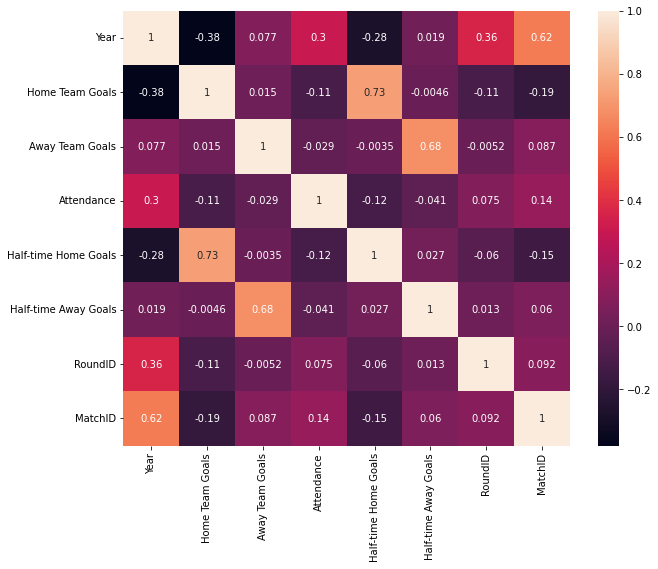

In [128]:
plt.figure(figsize =(10,8))
sns.heatmap(data = df_matches.corr(), cmap= 'rocket',annot = True);

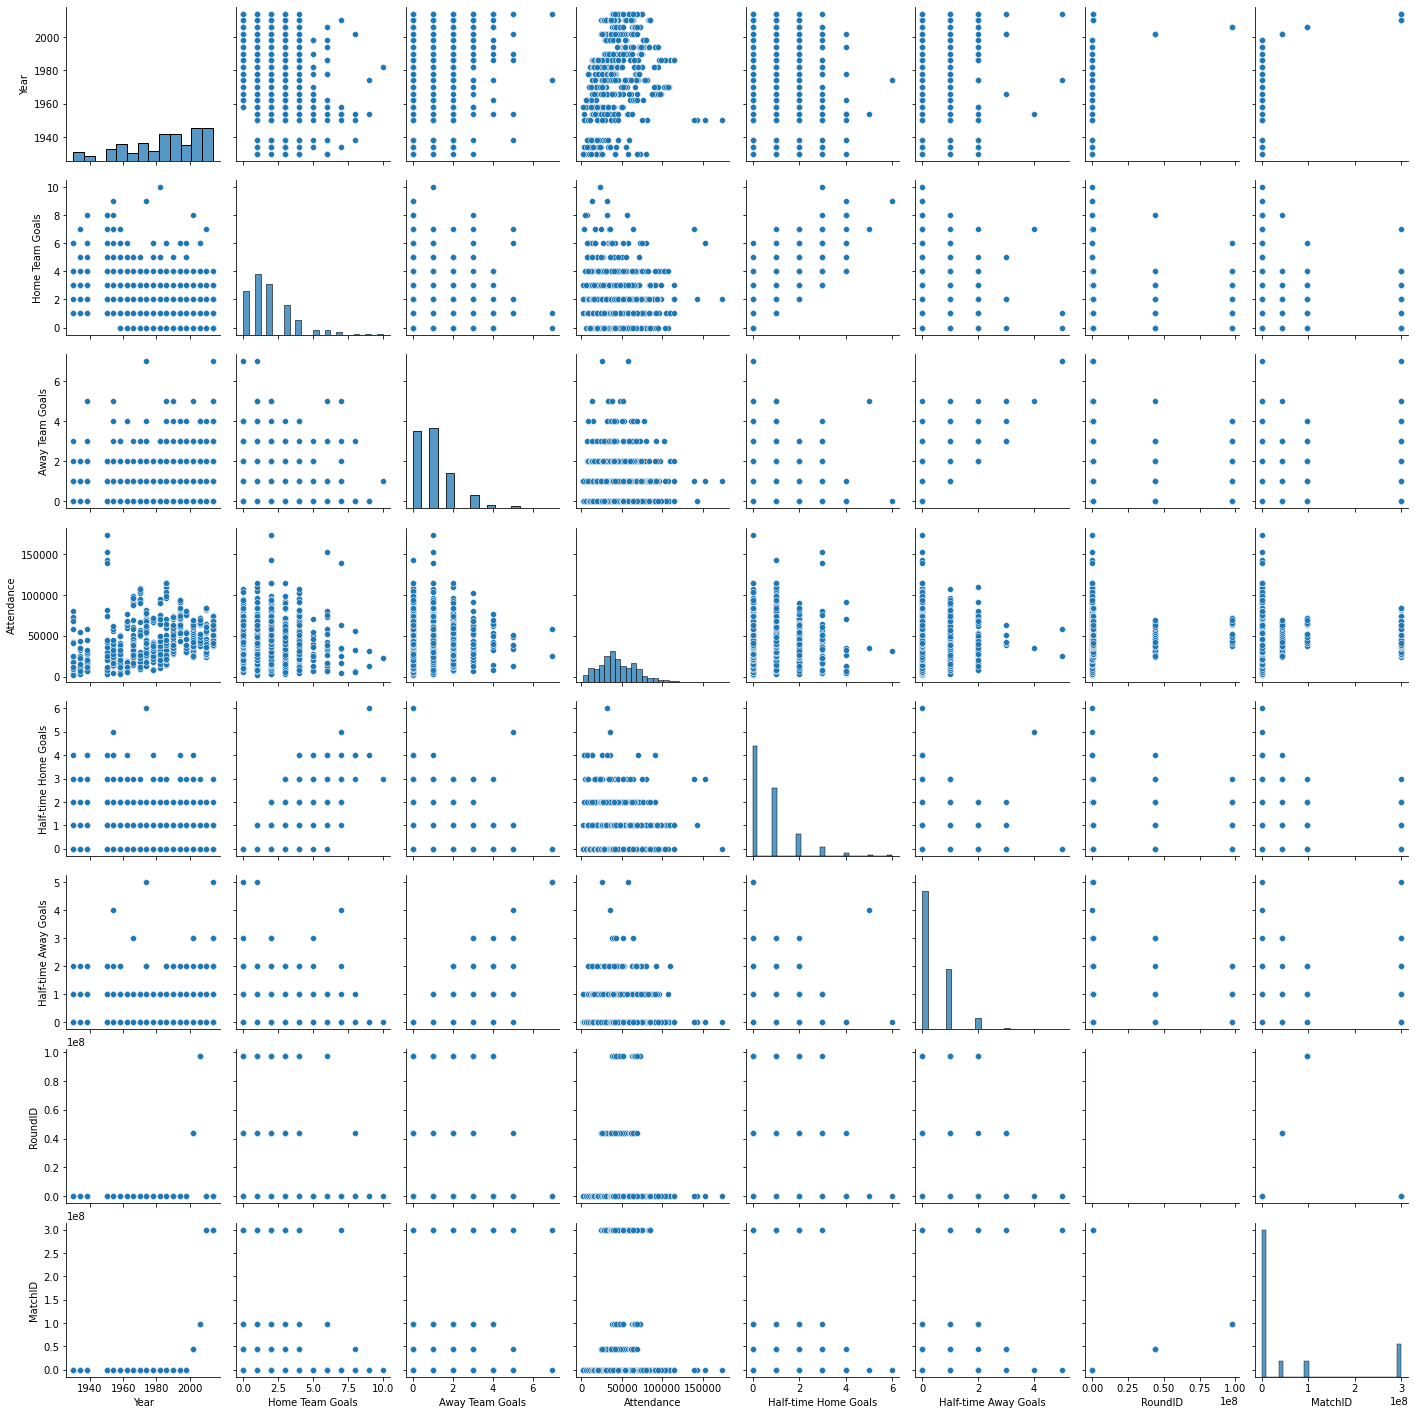

In [131]:
sns.pairplot(df_matches);

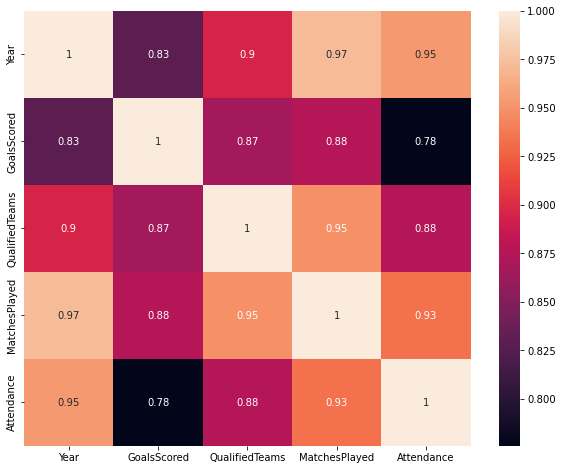

In [130]:
plt.figure(figsize =(10,8))
sns.heatmap(data = df_worldcup.corr(), cmap= 'rocket',annot = True);

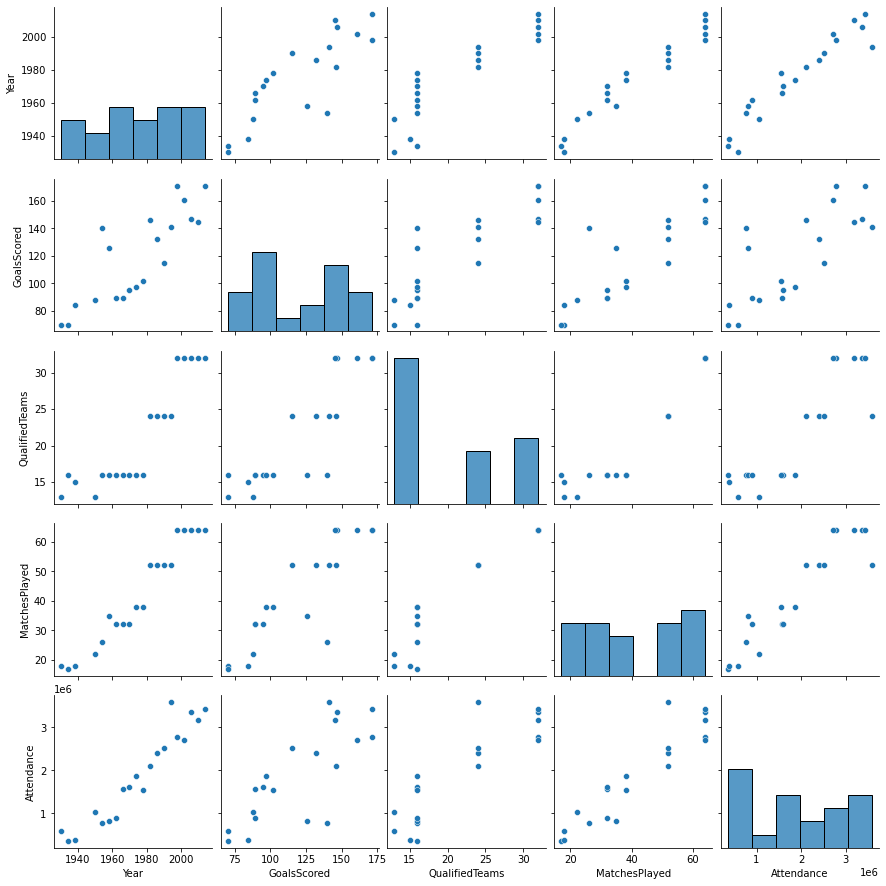

In [133]:
sns.pairplot(df_worldcup);

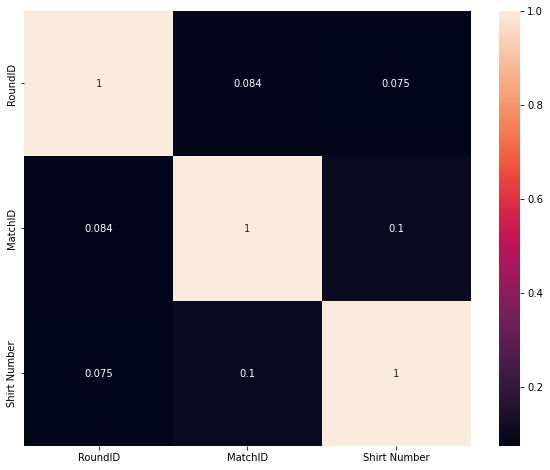

In [62]:
plt.figure(figsize =(10,8))
sns.heatmap(data = df_players.corr(), cmap= 'rocket',annot = True); 

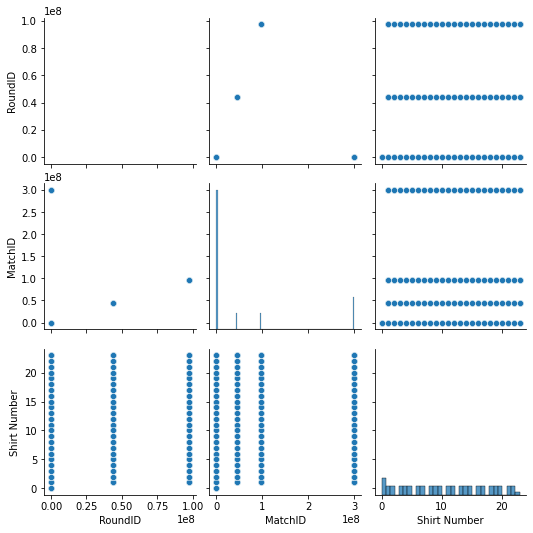

In [132]:
sns.pairplot(df_players);

### Now that the Data is clean, we can save the file in to an excel file. Later we can upload the excel file for exploratory analysis. 

In [134]:
df_matches.to_excel("matches1.xlsx")
df_players.to_excel("players1.xlsx")
df_worldcup.to_excel("worldcup1.xlsx")

### Let's upload the file and carry our exploratory analysis

In [136]:
df_matches1 = pd.read_excel("matches1.xlsx", index_col= 0)
df_players1 = pd.read_excel("players1.xlsx", index_col= 0)
df_worldcup1 = pd.read_excel("worldcup1.xlsx", index_col= 0)

In [137]:
df_matches1.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA


In [138]:
df_players1.head(3)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER


In [172]:
df_worldcup1.head(3)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700


### Let's do some Exploratory Data Analysis of WorldCup data

### 1. who are the Top-5 Teams?

In [145]:
winner = df_worldcup['Winner'].value_counts()
winner    #looks like Brazil  won 5 times
#winner = pd.DataFrame(winner).reset_index()

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

In [148]:
runnersUp =df_worldcup['Runners-Up'].value_counts()
runnersUp   #looks like Argentina came as Runners-Up three times

Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [146]:
third = df_worldcup['Third'].value_counts()
third  #looks like Germany came as third three times

Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: Third, dtype: int64

In [149]:
top5_teams = pd.concat([winner, runnersUp, third], axis = 1)
top5_teams

,Winner,Runners-Up,Third
Brazil,5.0,2.0,2.0
Italy,4.0,2.0,1.0
Germany,4.0,4.0,4.0
Uruguay,2.0,NaN,NaN
Argentina,2.0,3.0,NaN
England,1.0,NaN,NaN
France,1.0,1.0,2.0
Spain,1.0,NaN,NaN
Netherlands,NaN,3.0,1.0
Czechoslovakia,NaN,2.0,NaN


In [153]:
top5_teams.fillna(0, inplace = True)
top5_teams = top5_teams.astype(int)
top5_teams.head()

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0


### 2. Who won the maximum number of WorldCups

In [173]:
winner_count=pd.DataFrame(df_worldcup['Winner'].value_counts()).reset_index()
winner_count

,index,Winner
0,Brazil,5
1,Italy,4
2,Germany,4
3,Uruguay,2
4,Argentina,2
5,England,1
6,France,1
7,Spain,1


In [174]:
winner_count.rename(columns={'index': 'Country', 'Winner': 'No_of_times_stood_as_winner'}, inplace = True)
winner_count

,Country,No_of_times_stood_as_winner
0,Brazil,5
1,Italy,4
2,Germany,4
3,Uruguay,2
4,Argentina,2
5,England,1
6,France,1
7,Spain,1


#### Display the Level (count value on the top of the bar chart) (using plotly)

In [176]:
px.bar(winner_count, x= 'Country', y= 'No_of_times_stood_as_winner', color= 'Country', text= 'No_of_times_stood_as_winner', title= 'Brazil won the maximum Number of World Cups')

### 2. Runners-Up count

In [177]:
runnersUp_count=pd.DataFrame(df_worldcup['Runners-Up'].value_counts()).reset_index()
runnersUp_count

,index,Runners-Up
0,Germany,4
1,Argentina,3
2,Netherlands,3
3,Czechoslovakia,2
4,Hungary,2
5,Brazil,2
6,Italy,2
7,Sweden,1
8,France,1


In [178]:
runnersUp_count.rename(columns={'index': 'Country', 'Runners-Up': 'No_of_times_stood_as_RunnersUp'}, inplace = True)
runnersUp_count

,Country,No_of_times_stood_as_RunnersUp
0,Germany,4
1,Argentina,3
2,Netherlands,3
3,Czechoslovakia,2
4,Hungary,2
5,Brazil,2
6,Italy,2
7,Sweden,1
8,France,1


In [179]:
px.bar(runnersUp_count, x= 'Country', y= 'No_of_times_stood_as_RunnersUp', color= 'Country', text= 'No_of_times_stood_as_RunnersUp', title= 'number of times stood as Runners-Up')

### 2. In which year most number of Goals were scored

In [194]:
px.bar(df_worldcup, x= 'Year', y= 'GoalsScored', text= 'GoalsScored', title= 'Goal Scored over the years')

In [193]:
df_worldcup.sort_values(['GoalsScored'], ascending = False)


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3431974
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2785100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2705197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3359439
11,1982,Spain,Italy,Germany,Poland,France,146,24,52,2109723
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3178856
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3587538
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607
12,1986,Mexico,Argentina,Germany,France,Belgium,132,24,52,2394031
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810


### Attendance over the years

In [197]:
px.line(df_worldcup, x= 'Year', y= 'Attendance',hover_data = ['Attendance', 'Year'], title= 'Attendance over the years')  # text= 'Attendance' 

In [198]:
px.line(df_worldcup, x= 'Year', y= 'GoalsScored', text= 'GoalsScored', title= 'Goal Scored over the years')

### Let's Check with the coaches

### No of matches trained by the Coaches 

In [318]:
coach_matchID= df_players[['Coach Name', 'MatchID']]
coach_matchID

,Coach Name,MatchID
0,CAUDRON Raoul (FRA),1096
1,LUQUE Juan (MEX),1096
2,CAUDRON Raoul (FRA),1096
3,LUQUE Juan (MEX),1096
4,CAUDRON Raoul (FRA),1096
...,...,...
37043,KLINSMANN Juergen (GER),300186497
37044,WILMOTS Marc (BEL),300186497
37045,KLINSMANN Juergen (GER),300186497
37046,WILMOTS Marc (BEL),300186497


#### The reason behind dropping the duplicate Coach name is- for a team with approx 23 players, the same Coach name is repeated 23 times. we have to make sure there is a coach per team, not per player. 

In [319]:
coach_matchID.drop_duplicates(inplace =  True)
coach_matchID

C:\Users\Acer\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Coach Name,MatchID
0,CAUDRON Raoul (FRA),1096
1,LUQUE Juan (MEX),1096
33,MILLAR Bob (USA),1090
34,GOETINCK Hector (BEL),1090
65,SIMONOVIC Bosko (YUG),1093
...,...,...
36911,SANTOS Fernando (POR),300186459
36956,SABELLA Alejandro (ARG),300186503
36957,HITZFELD Ottmar (GER),300186503
37002,WILMOTS Marc (BEL),300186497


In [320]:
number_of_matches_trained_by_coach= coach_matchID.groupby(['Coach Name'])['MatchID'].count().sort_values(ascending= False)
number_of_matches_trained_by_coach
#number_of_matches_trained_by_coach.sort_values(ascending= False)

Coach Name
SCHOEN Helmut (FRG)               25
PARREIRA Carlos Alberto (BRA)     23
SCOLARI Luiz Felipe (BRA)         21
ZAGALLO Mario (BRA)               20
MILUTINOVIC Bora (YUG)            20
                                  ..
McREA James (SCO)                  1
VAN MASTENBROEK Johannes (NED)     1
KALUZA Jozef (POL)                 1
CEJP Josef (TCH)                   1
KIM Pyung Seok (KOR)               1
Name: MatchID, Length: 335, dtype: int64

### Top 10 Coaches

In [325]:
Top_10_coaches = number_of_matches_trained_by_coach.nlargest(n=10)
Top_10_coaches

Coach Name
SCHOEN Helmut (FRG)              25
PARREIRA Carlos Alberto (BRA)    23
SCOLARI Luiz Felipe (BRA)        21
ZAGALLO Mario (BRA)              20
MILUTINOVIC Bora (YUG)           20
BEARZOT Enzo (ITA)               18
HERBERGER Sepp (FRG)             18
HIDDINK Guus (NED)               18
THYS Guy (BEL)                   16
MICHEL Henri (FRA)               16
Name: MatchID, dtype: int64

### Bottom-10 Coaches

In [326]:
Bottom_10_coaches = number_of_matches_trained_by_coach.nsmallest(n=10)
Bottom_10_coaches

Coach Name
PASCUCCI Felipe (ITA)         1
BUTLER Jack (ENG)             1
RADULESCU Constantin (ROU)    1
AL KARASHI Mohamed (KSA)      1
SELMI Ali (TUN)               1
LUIZ VINHAES (BRA)            1
POPIVODA Danilo (SVN)         1
MENDOZA Alexis (COL)          1
GOULD David (USA)             1
HALVORSEN Asbjorn (NOR)       1
Name: MatchID, dtype: int64

### You can plot both graphs in a single plane using matplotlib

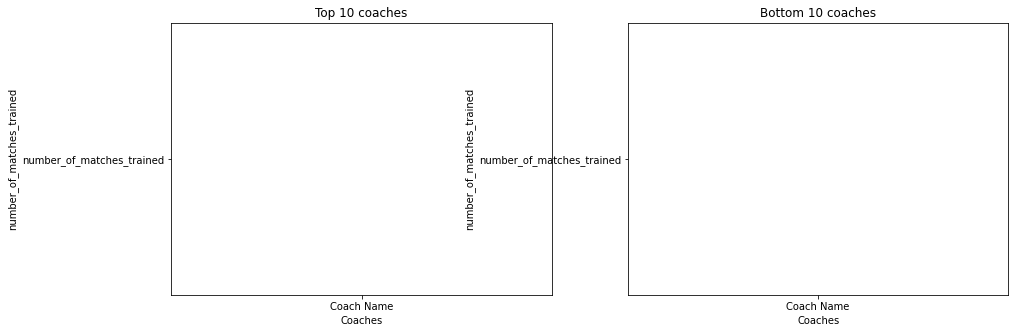

In [331]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(data=Top_10_coaches, x='Coach Name', height='number_of_matches_trained')
plt.xlabel("Coaches")
plt.ylabel("number_of_matches_trained")
plt.title('Top 10 coaches')
plt.subplot(1,2,2)
plt.bar(data=Bottom_10_coaches, x='Coach Name', height='number_of_matches_trained')
plt.xlabel("Coaches")
plt.ylabel("number_of_matches_trained")
plt.title('Bottom 10 coaches')
plt.show()

### Put the Top-10 Coaches in a Data Frame

In [332]:
Top_10_coaches = pd.DataFrame(Top_10_coaches).reset_index()
Top_10_coaches

,Coach Name,MatchID
0,SCHOEN Helmut (FRG),25
1,PARREIRA Carlos Alberto (BRA),23
2,SCOLARI Luiz Felipe (BRA),21
3,ZAGALLO Mario (BRA),20
4,MILUTINOVIC Bora (YUG),20
5,BEARZOT Enzo (ITA),18
6,HERBERGER Sepp (FRG),18
7,HIDDINK Guus (NED),18
8,THYS Guy (BEL),16
9,MICHEL Henri (FRA),16


In [333]:
Top_10_coaches.rename(columns={'MatchID': 'number_of_matches_trained'}, inplace = True)
Top_10_coaches

,Coach Name,number_of_matches_trained
0,SCHOEN Helmut (FRG),25
1,PARREIRA Carlos Alberto (BRA),23
2,SCOLARI Luiz Felipe (BRA),21
3,ZAGALLO Mario (BRA),20
4,MILUTINOVIC Bora (YUG),20
5,BEARZOT Enzo (ITA),18
6,HERBERGER Sepp (FRG),18
7,HIDDINK Guus (NED),18
8,THYS Guy (BEL),16
9,MICHEL Henri (FRA),16


### plot the barchart using plotly

In [334]:
plt.figure(figsize=(15,5))
px.bar(Top_10_coaches, x='Coach Name', y= 'number_of_matches_trained', text= 'number_of_matches_trained', title= 'Top-10 coaches')    
#Top_10_coaches.plot(kind='bar')   #general bar plot

<Figure size 1080x360 with 0 Axes>

### Put the Top-10 Coaches in a Data Frame

In [335]:
Bottom_10_coaches = pd.DataFrame(Bottom_10_coaches).reset_index()
Bottom_10_coaches.rename(columns={'MatchID': 'number_of_matches_trained'}, inplace = True)
Bottom_10_coaches

,Coach Name,number_of_matches_trained
0,PASCUCCI Felipe (ITA),1
1,BUTLER Jack (ENG),1
2,RADULESCU Constantin (ROU),1
3,AL KARASHI Mohamed (KSA),1
4,SELMI Ali (TUN),1
5,LUIZ VINHAES (BRA),1
6,POPIVODA Danilo (SVN),1
7,MENDOZA Alexis (COL),1
8,GOULD David (USA),1
9,HALVORSEN Asbjorn (NOR),1


### Plot the bar chart using plotly

In [336]:
plt.figure(figsize=(15,5))
px.bar(Bottom_10_coaches, x='Coach Name', y= 'number_of_matches_trained', text= 'number_of_matches_trained', title= 'Bottom-10 coaches')
#Bottom_10_coaches.plot(kind='bar')

<Figure size 1080x360 with 0 Axes>

### Count of shirt numbers

In [278]:
df_players['Shirt Number'].value_counts()

0     3069
1     1527
10    1522
15    1522
19    1522
14    1522
16    1522
11    1522
9     1522
12    1522
8     1522
7     1522
18    1522
4     1522
3     1522
2     1522
6     1522
17    1521
5     1521
20    1519
13    1518
21    1514
22    1512
23     517
Name: Shirt Number, dtype: int64

### Number of matches played by Home teams and Away teams

In [284]:
df_matches['Home Team Name'].value_counts()

Brazil                        78
Italy                         57
Argentina                     52
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 78, dtype: int64

In [285]:
df_matches['Away Team Name'].value_counts()

Mexico               37
France               30
Spain                29
England              27
Italy                26
                     ..
Dutch East Indies     1
Togo                  1
Cuba                  1
Zaire                 1
Iraq                  1
Name: Away Team Name, Length: 83, dtype: int64

In [306]:
df_matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL


### Using Plotly create a Dual chart (two chart in one plane)

In [307]:
matches_pivot=pd.pivot_table(df_matches, values= ['Home Team Goals', 'Away Team Goals'], index= 'Year')
matches_pivot

,Away Team Goals,Home Team Goals
Year,,
1930,0.611111,3.277778
1934,1.294118,2.823529
1938,1.277778,3.388889
1950,0.863636,3.136364
1954,1.192308,4.192308
1958,1.085714,2.514286
1962,0.625000,2.156250
1966,0.625000,2.156250
1970,0.718750,2.250000


In [308]:
matches_pivot.rename(columns= {'Away Team Goals': 'AwayGoals', 'Home Team Goals':'HomeGoals'}, inplace=True)
matches_pivot

,AwayGoals,HomeGoals
Year,,
1930,0.611111,3.277778
1934,1.294118,2.823529
1938,1.277778,3.388889
1950,0.863636,3.136364
1954,1.192308,4.192308
1958,1.085714,2.514286
1962,0.625000,2.156250
1966,0.625000,2.156250
1970,0.718750,2.250000


In [316]:
fig = go.Figure()

fig.add_trace(go.Scatter( x= matches_pivot.index, y= matches_pivot.AwayGoals, mode='lines', name= 'Average AwayGoals over the years'))
fig.add_trace(go.Scatter( x= matches_pivot.index, y= matches_pivot.HomeGoals, mode='lines', name= 'Average HomeGoals over the years'))

fig.update_layout(title = "Average Home Goals and Away Goals over years", xaxis_title= 'Year', yaxis_title= 'Avg Goals' )



### Which player played the most number of games

In [259]:
player_match = df_players[['Player Name', 'Team Initials', 'MatchID']]
player_match

,Player Name,Team Initials,MatchID
0,Alex THEPOT,FRA,1096
1,Oscar BONFIGLIO,MEX,1096
2,Marcel LANGILLER,FRA,1096
3,Juan CARRENO,MEX,1096
4,Ernest LIBERATI,FRA,1096
...,...,...,...
37043,ALTIDORE,USA,300186497
37044,DEFOUR,BEL,300186497
37045,WONDOLOWSKI,USA,300186497
37046,VANDEN BORRE,BEL,300186497


In [262]:
player_match.groupby(['Player Name'])['MatchID'].count().sort_values(ascending = False)  #Ronaldo

Player Name
RONALDO                33
KLOSE                  28
CAFU                   26
Sepp MAIER             25
DIDA                   25
                       ..
Peter PIETRAS           1
Alfredo DE VINCENZI     1
John VAN ALPHEN         1
Duberty ARAOZ           1
Ryszard PIEC            1
Name: MatchID, Length: 7663, dtype: int64

### Top 5 players

In [265]:
top5_players = player_match.groupby(['Player Name'])['MatchID'].count().sort_values(ascending = False).nlargest(n=5)
top5_players

Player Name
RONALDO       33
KLOSE         28
CAFU          26
Sepp MAIER    25
DIDA          25
Name: MatchID, dtype: int64

In [266]:
top5_players = pd.DataFrame(top5_players).reset_index()
top5_players.rename(columns={'MatchID' : 'No of matches played'} , inplace= True)
top5_players

,Player Name,No of matches played
0,RONALDO,33
1,KLOSE,28
2,CAFU,26
3,Sepp MAIER,25
4,DIDA,25


In [267]:
px.bar(top5_players, x = 'Player Name', y= 'No of matches played', text= 'No of matches played' , color= 'Player Name', title = 'Number of matches played by Top 5 Players')

### Join the Match and the Worldcup tables on the common column Year

In [338]:
join1= df_matches1.merge(df_worldcup1, how= 'left', on = 'Year' )   #join match and Worldcup tables on the year column
join1.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Away Team Initials,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_y
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,MEX,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,...,BEL,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,BRA,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,...,PER,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,...,FRA,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549


### You can Drop the Columns that you don't want OR you can just pick the columns you want and 
### save it as a DataFrame and use it for further Analysis.

In [101]:
#df_new.drop(['Third', 'Fourth', 'Line-up', 'Shirt Number' , 'Coach Name', 'Home Team Initials_y',  'Away Team Initials_y', 'Datetime_y'], axis = 1,  inplace = True)
#df_new.head()

,RoundID,MatchID,Country,Winner,GoalsScored,QualifiedTeams,MatchesPlayed,Year_y,Datetime_y,Stage_y,...,Away Team Name_y,Attendance,Half-time Home Goals_y,Half-time Away Goals_y,RoundID_x,Home Team Initials_y,Away Team Initials_y,Team Initials,Player Name,conc
0,201,1096,Uruguay,Uruguay,70,13,18,1930,13 Jul 1930 - 15:00,Group 1,...,Mexico,4444.0,3,0,201,FRA,MEX,FRA,Alex THEPOT,1096 FRA
1,201,1096,Uruguay,Uruguay,70,13,18,1930,13 Jul 1930 - 15:00,Group 1,...,Mexico,4444.0,3,0,201,FRA,MEX,MEX,Oscar BONFIGLIO,1096 MEX
2,201,1096,Uruguay,Uruguay,70,13,18,1930,13 Jul 1930 - 15:00,Group 1,...,Mexico,4444.0,3,0,201,FRA,MEX,FRA,Marcel LANGILLER,1096 FRA
3,201,1096,Uruguay,Uruguay,70,13,18,1930,13 Jul 1930 - 15:00,Group 1,...,Mexico,4444.0,3,0,201,FRA,MEX,MEX,Juan CARRENO,1096 MEX
4,201,1096,Uruguay,Uruguay,70,13,18,1930,13 Jul 1930 - 15:00,Group 1,...,Mexico,4444.0,3,0,201,FRA,MEX,FRA,Ernest LIBERATI,1096 FRA


In [102]:
#list_new = list(df_new)
#sorted(list_new)


['Attendance',
 'Away Team Goals_y',
 'Away Team Initials_y',
 'Away Team Name_y',
 'City_y',
 'Country',
 'Datetime_y',
 'GoalsScored',
 'Half-time Away Goals_y',
 'Half-time Home Goals_y',
 'Home Team Goals_y',
 'Home Team Initials_y',
 'Home Team Name_y',
 'MatchID',
 'MatchesPlayed',
 'Player Name',
 'QualifiedTeams',
 'RoundID',
 'RoundID_x',
 'Stadium_y',
 'Stage_y',
 'Team Initials',
 'Winner',
 'Year_y',
 'conc']

### I have considered  the relevant columns for analysis

In [355]:
df_match_winners = join1[['Year', 'Stage', 'Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Winner']]
df_match_winners

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Winner
0,1930,Group 1,France,4,1,Mexico,Uruguay
1,1930,Group 4,USA,3,0,Belgium,Uruguay
2,1930,Group 2,Yugoslavia,2,1,Brazil,Uruguay
3,1930,Group 3,Romania,3,1,Peru,Uruguay
4,1930,Group 1,Argentina,1,0,France,Uruguay
...,...,...,...,...,...,...,...
831,2014,Quarter-finals,Argentina,1,0,Belgium,Germany
832,2014,Round of 16,Netherlands,2,1,Mexico,Germany
833,2014,Round of 16,Costa Rica,1,1,Greece,Germany
834,2014,Round of 16,Argentina,1,0,Switzerland,Germany


### Check for the Countries total goals till now 

In [340]:
home = df_match_winners[['Home Team Name', 'Home Team Goals']]
home

,Home Team Name,Home Team Goals
0,France,4
1,USA,3
2,Yugoslavia,2
3,Romania,3
4,Argentina,1
...,...,...
831,Argentina,1
832,Netherlands,2
833,Costa Rica,1
834,Argentina,1


In [341]:
away = df_match_winners[['Away Team Name', 'Away Team Goals']]
away

,Away Team Name,Away Team Goals
0,Mexico,1
1,Belgium,0
2,Brazil,1
3,Peru,1
4,France,0
...,...,...
831,Belgium,0
832,Mexico,1
833,Greece,1
834,Switzerland,0


In [342]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [343]:
goals = home.append(away, ignore_index=True)
goals

,Countries,Goals
0,France,4
1,USA,3
2,Yugoslavia,2
3,Romania,3
4,Argentina,1
...,...,...
1667,Belgium,0
1668,Mexico,1
1669,Greece,1
1670,Switzerland,0


In [344]:
goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,13
Angola,1
Argentina,131
Australia,11
Austria,43
...,...
United Arab Emirates,2
Uruguay,80
Wales,4


In [349]:
goals = goals.sort_values(by = 'Goals', ascending=False)
goals

,Goals
Countries,
Germany,224
Brazil,221
Argentina,131
Italy,128
France,106
...,...
Dutch East Indies,0
Canada,0
Trinidad and Tobago,0


In [350]:
goals.nlargest(10,'Goals')    #Top-10 Highest Goal Scoring Teams

,Goals
Countries,
Germany,224
Brazil,221
Argentina,131
Italy,128
France,106
Spain,92
Hungary,87
Netherlands,86
Uruguay,80


In [352]:
px.bar(goals.nlargest(10,'Goals') , x= 'Goals',  text= 'Goals', title= 'Top-10 countries')

### Assign 0/1 on the basis of wins by creating a new column

In [356]:
df_match_winners.head()

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Winner
0,1930,Group 1,France,4,1,Mexico,Uruguay
1,1930,Group 4,USA,3,0,Belgium,Uruguay
2,1930,Group 2,Yugoslavia,2,1,Brazil,Uruguay
3,1930,Group 3,Romania,3,1,Peru,Uruguay
4,1930,Group 1,Argentina,1,0,France,Uruguay


In [365]:
#define conditions
conditions = [df_match_winners['Home Team Name'] == df_match_winners['Winner'], 
              df_match_winners['Away Team Name'] == df_match_winners['Winner']]

#define choices
choices = [1, 1]

#create new column in DataFrame that displays results of comparisons
df_match_winners['wc_winner'] = np.select(conditions, choices, 0)
df_match_winners


C:\Users\Acer\AppData\Local\Temp/ipykernel_3916/1962077082.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Winner,wc_winner
0,1930,Group 1,France,4,1,Mexico,Uruguay,0
1,1930,Group 4,USA,3,0,Belgium,Uruguay,0
2,1930,Group 2,Yugoslavia,2,1,Brazil,Uruguay,0
3,1930,Group 3,Romania,3,1,Peru,Uruguay,0
4,1930,Group 1,Argentina,1,0,France,Uruguay,0
...,...,...,...,...,...,...,...,...
831,2014,Quarter-finals,Argentina,1,0,Belgium,Germany,0
832,2014,Round of 16,Netherlands,2,1,Mexico,Germany,0
833,2014,Round of 16,Costa Rica,1,1,Greece,Germany,0
834,2014,Round of 16,Argentina,1,0,Switzerland,Germany,0


In [366]:
#view the DataFrame
df_match_winners
df_match_winners[df_match_winners['wc_winner']==1]

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Winner,wc_winner
8,1930,Group 3,Uruguay,1,0,Peru,Uruguay,1
13,1930,Group 3,Uruguay,4,0,Romania,Uruguay,1
16,1930,Semi-finals,Uruguay,6,1,Yugoslavia,Uruguay,1
17,1930,Final,Uruguay,4,2,Argentina,Uruguay,1
24,1934,Preliminary round,Italy,7,1,USA,Italy,1
...,...,...,...,...,...,...,...,...
816,2014,Group G,USA,0,1,Germany,Germany,1
823,2014,Round of 16,Germany,2,1,Algeria,Germany,1
825,2014,Quarter-finals,France,0,1,Germany,Germany,1
826,2014,Semi-finals,Brazil,1,7,Germany,Germany,1


In [367]:
df_match_winners.to_csv('finalfile.csv')

In [237]:
#df_players['conc'] = df_players['MatchID'].astype(str)+ ' '+ df_players['Team Initials']
#df_players

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,conc
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN,1096 FRA
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN,1096 MEX
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1096 FRA
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1096 MEX
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN,1096 FRA
...,...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN,300186501 ARG
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN,300186501 GER
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65',300186501 ARG
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN,300186501 GER
